## Homework 2
### Mathematical & Computational Modeling of Infectious Diseases
#### Caleb Cordsen

In [1]:
# Import numpy for linspace and matplotlib 
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.optimize import fsolve

#### <u>Problem 1a</u>

In [2]:
# Define a function SISPlot that will simulate an SIS model using both Forward Euler and the Analytical Solution
# It will plot i(t) from time 0 to 25 and y axis scale 0 to 0.5. 
# It will take initial values for s0, i0, Beta, Gamma and deltaT (the timestep)
def SISPlot(sZero,iZero,Beta,Gamma,deltaT):
    # Set up some initial constants like rNot and constant components of the analytical solution to simplify equation later
    rNot = Beta/Gamma
    numeratorA = 1-(1/rNot)
    eConstant = (numeratorA-iZero) / iZero
    exponent = Beta-Gamma
    # Set up an empty list of time values
    time = []
    # Set up lists for sValuesE (s values from Euler). Start with sZero
    sValuesE = [sZero]
    # Set up lists for iValuesE (i values from Euler) and iValuesA (i values from Analytical). Both start with iZero
    iValuesE = [iZero]
    iValuesA = [iZero]
    # Set a counter at t = 0. Then use a while loop to construct the list of time values by appending the counter and then incrementing it
    # by deltaT
    counter = 0
    while counter<=26:
        time.append(counter)
        counter += deltaT
    # Loop through the time values getting both their position in the list and their actual time value t
    for index,value in enumerate(time):
        # If it it the first value in the list we can move on
        if(index!=0):
            # Grab the previous s value from the list
            sPrev = sValuesE[index-1]
            # Grab the previous i value from the list
            iPrev = iValuesE[index-1]
            # Compute the iNew based on Euler's method. yn+1 = yn+deltaY becomes in+1 = in + deltaT*i dot basically
            iNewE = iPrev+deltaT*(Beta*sPrev*iPrev-Gamma*iPrev)
            # Compute the sNew based on Euler's method
            sNewE = sPrev+deltaT*(-Beta*sPrev*iPrev+Gamma*iPrev)
            # Comptue the iNew based on analytical method. This involves using the current time value or value in the loop
            iNewA = numeratorA/(1+eConstant*math.e**(-exponent*value))
            # Append results
            iValuesE.append(iNewE)
            iValuesA.append(iNewA)
            sValuesE.append(sNewE)
    # Plot the results and give appropiate axis titles and graph title
    # These articles were used to figure out how to put greek letters into strings
    # https://medium.com/@johinamaria/how-to-print-chi-square-alpha-or-beta-in-a-plot-in-python-d0d461219c00
    # https://www.compart.com/en/unicode/U+0394
    plt.title("Caleb's SIS Simulation Where \u03B2="+str(Beta)+" and \u03B3="+str(Gamma)+" and \u0394T="+str(deltaT))
    plt.xlabel("Time")
    plt.ylabel("Proportion of Population")
    # Plot each list of values against the time list and give them appropiate colors and labels
    # Don't need to plot s values for actual problem
    # plt.plot(time,sValuesE,"blue",label="S Caleb")
    plt.plot(time,iValuesE,"red",label="Caleb Forward Euler")
    # Dashed line reference https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
    plt.plot(time,iValuesA,"black",linestyle='dashed',label="Caleb Analytical")
    # This link was used to make sure the axis both start at 0,0 in the bottom left rather than
    # having gaps
    # https://www.tutorialspoint.com/how-to-show-0-0-on-matplotlib-graph-at-the-bottom-left-corner
    plt.xlim([0,25])
    plt.ylim([0,0.5])
    # Set the legends location
    plt.legend(loc="center right")
    plt.show()

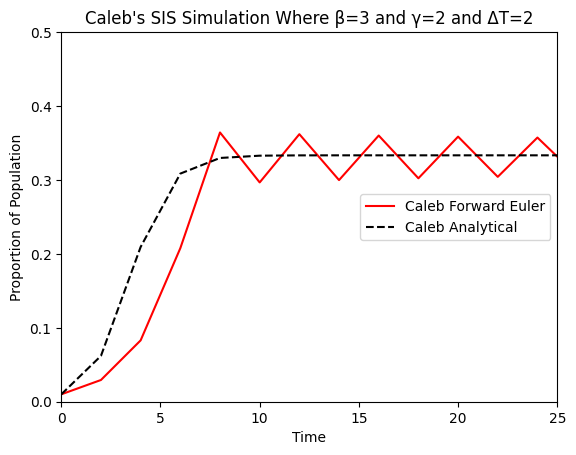

In [3]:
SISPlot(0.99,0.01,3,2,2)

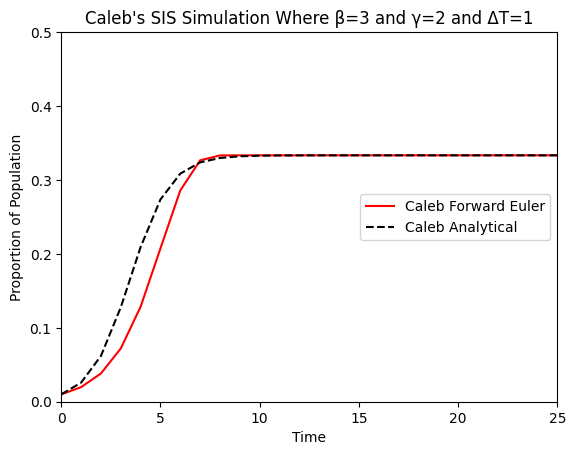

In [4]:
SISPlot(0.99,0.01,3,2,1)

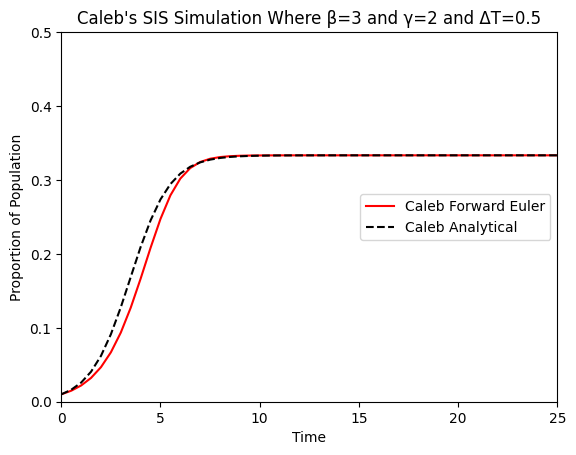

In [5]:
SISPlot(0.99,0.01,3,2,0.5)

#### <u>Problem 1c</u>

In [6]:
# Problem 1c
# Define a function maxAbError that takes in a deltaT and will calculate the max|IEuler(t) - IAnalytical(t)| using the deltaT.
# Because other initial start up parameters were not provided to us I just carried over the same ones from problem 1a i.e.
# beta = 3, gamma = 2, s0 = 0.99, i0=0.01
def maxAbError(deltaT):
    # Set up some initial constants like rNot and constant components of the analytical solution to simplify equation later
    Beta = 3
    Gamma = 2
    rNot = Beta/Gamma
    numeratorA = 1-(1/rNot)
    eConstant = (numeratorA-0.01) / 0.01
    exponent = Beta-Gamma
    # Set the currMax to be a negative number so it gets replaced with the first calculated number (abs value will always produce a positive)
    currMax = -1
    # Set up variables sPrev and iPrev which at the start will be the initial s0 and i0 values
    sPrev = 0.99
    iPrev = 0.01
    # Set up a timeCounter
    timeCounter = 0
    # I chose to simulate until time unit 10,000 sort of arbitraly. I started with 1000, then 10,000 and then 1,000,000 during testing
    # They all produced the same values so I chose 10,000 because it is pretty large but it was still pretty fast for computation while 1,000,000 took a while
    while timeCounter<=10000:
        # Increment the timeCounter by deltaT
        timeCounter += deltaT
        # Calculate new i,s from Euler as well as a new i for Analytical
        iNewE = iPrev+deltaT*(Beta*sPrev*iPrev-Gamma*iPrev)
        sNewE = sPrev+deltaT*(-Beta*sPrev*iPrev+Gamma*iPrev)
        # Time counter will represent our t for our analytical equation
        iNewA = numeratorA/(1+eConstant*math.e**(-exponent*timeCounter))
        # Make a new variable potential that takes the absolute value of Euler-Analytical
        potential = abs(iNewE-iNewA)
        # If the potential is higher than the currMax set the currMax to the potential
        if(potential>currMax):
            currMax = potential
        # Set sPrev and iPrev to this iterations numbers to prepare for the next iteration
        sPrev = sNewE
        iPrev = iNewE
    # After the time loop has concluded return the max
    return currMax

#### <u>Problem 1d</u>

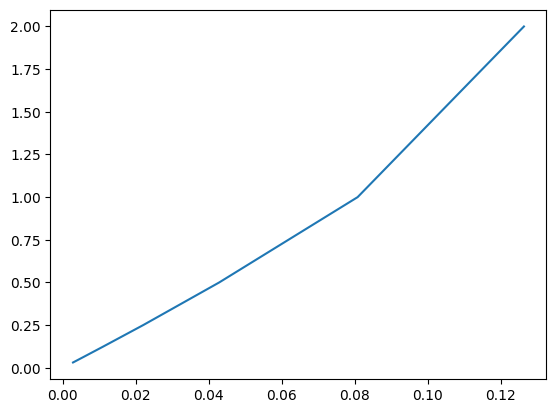

In [7]:
# Set up an x list that contains the max ab error values for each delta t value. Set up a y list that contains the delta t
# values
x = [maxAbError(2),maxAbError(1),maxAbError(0.5),maxAbError(0.25),maxAbError(1/8),maxAbError(1/16),maxAbError(1/32)]
y = [2,1,0.5,0.25,1/8,1/16,1/32]
# Just quickly plot the raw data to look at it
plt.plot(x,y)
plt.show()

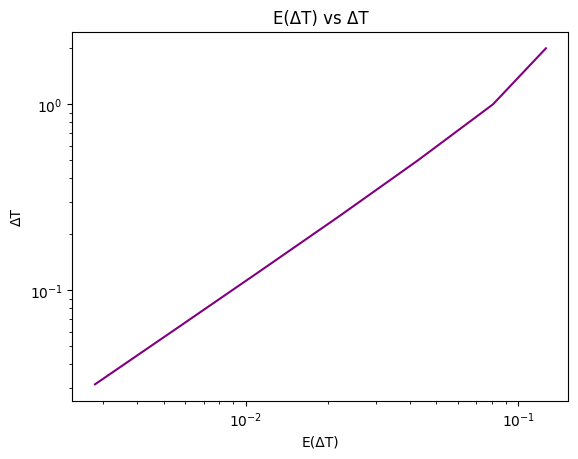

In [8]:
# Create a plot of E(deltaT) vs deltaT on a log log axes as instructed
# Guidance on .loglog was found here 
# https://www.geeksforgeeks.org/matplotlib-pyplot-loglog-function-in-python/
plt.loglog(x,y,color="purple")
# Label appropiately
plt.title("E(\u0394T) vs \u0394T")
plt.xlabel("E(\u0394T)")
plt.ylabel("\u0394T")
plt.show()

#### <u>Problem 2c</u>

In [9]:
# Define a function that will simulate a basic SIR All-Or-Nothing vaccine based on gamma, percent of pop that can be vaccinated,
# rnaught, vaccine efficacy, s0, i0, r0, N, and how long you want it to go on for
def AorNSimulator(Gamma,Vacc,Rnaught,VEff,s0,i0,r0,N,timeEnd):
    # This will ensure that I take steps of size 0.25 and set up our time
    timeSeries = np.linspace(0,timeEnd,timeEnd*4)
    # Recover Beta from RNaught and Gamma
    Beta = Rnaught * Gamma
    # Set up initial lists and deltaT
    deltaT = timeSeries[1]-timeSeries[0]
    sValues = [s0]
    iValues = [i0]
    rValues = [r0]
    # vB will be the vaccinated people with no protection according to the equations from class and vG will be full protection vaccinated people
    vBValues = [(1-VEff)*Vacc]
    vGValues = [VEff*Vacc]
    # Go ahead and using the timeSeries simulate a forward Euler method using the differential equations from class
    for index,value in enumerate(timeSeries):
        if(index!=0):
            iPrev = iValues[index-1]
            sPrev = sValues[index-1]
            vBPrev = vBValues[index-1]
            sNew = sPrev+deltaT*(-Beta*sPrev*iPrev)
            iNew = iPrev + deltaT*(Beta*sPrev*iPrev+Beta*vBPrev*iPrev-Gamma*iPrev)
            rNew = rValues[index-1] + deltaT*(Gamma*iPrev)
            vBNew = vBPrev + deltaT*(-Beta*vBPrev*iPrev)
            sValues.append(sNew)
            iValues.append(iNew)
            rValues.append(rNew)
            vBValues.append(vBNew)
            vGValues.append(VEff*Vacc)
    # Plot the results and give appropiate axis titles and graph title
    # This article was used to figure out how to put subscripts into strings
    # https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
    plt.title("All-Or-Nothing SIR Model Where R\u2080 = "+str(Rnaught))
    plt.xlabel("Time")
    plt.ylabel("People")
    # Plot each list of values*N against the time series and give them appropiate colors and labels
    plt.plot(timeSeries,[s*N for s in sValues],"blue",label="S")
    plt.plot(timeSeries,[i*N for i in iValues],"red",label="I")
    plt.plot(timeSeries,[r*N for r in rValues],"black",label="R")
    plt.plot(timeSeries,[v*N for v in vBValues],"green",label="Vaccinated No Protection")
    plt.plot(timeSeries,[v*N for v in vGValues],"purple",label="Vaccinated Complete Protection")
    plt.scatter(timeSeries[-1],rValues[-1]*N,color='black',label = "("+str(timeSeries[-1])+','+str(rValues[-1]*N)+")")
    # Also print the final values of each category for use
    print("The value of I at time t="+str(timeSeries[-1])+" is "+str(iValues[-1]*N))
    print("The value of R at time t="+str(timeSeries[-1])+" is "+str(rValues[-1]*N))
    print("The value of S at time t="+str(timeSeries[-1])+" is "+str(sValues[-1]*N))
    print("The value of Vaccine Total Protection at time t="+str(timeSeries[-1])+" is "+str(vGValues[-1]*N))
    print("The value of Vaccine No Protection at time t="+str(timeSeries[-1])+" is "+str(vBValues[-1]*N))
    # https://www.tutorialspoint.com/how-to-show-0-0-on-matplotlib-graph-at-the-bottom-left-corner
    # Set the legends location
    plt.legend(loc="center right")
    plt.show()

The value of I at time t=400.0 is 0.001307111021630099
The value of R at time t=400.0 is 169481.1118704174
The value of S at time t=400.0 is 8765.729278961839
The value of Vaccine Total Protection at time t=400.0 is 120000.0
The value of Vaccine No Protection at time t=400.0 is 1753.1575435093166


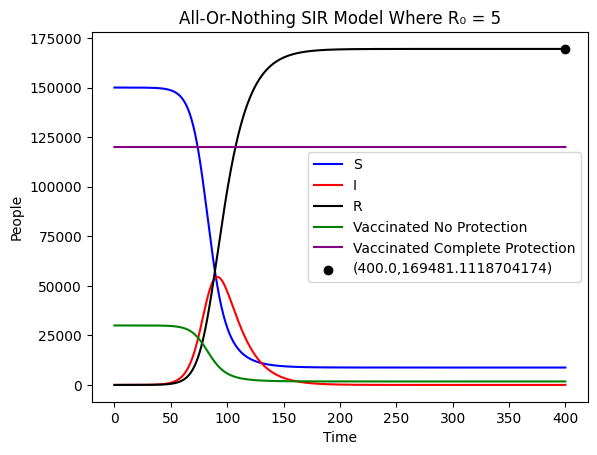

In [10]:
AorNSimulator(1/14,0.5,5,0.8,149999/300000,1/300000,0,300000,400)

The value of I at time t=500.0 is 0.00047503450421443024
The value of R at time t=500.0 is 158349.19340489694
The value of S at time t=500.0 is 18042.318386236395
The value of Vaccine Total Protection at time t=500.0 is 120000.0
The value of Vaccine No Protection at time t=500.0 is 3608.4877338321858


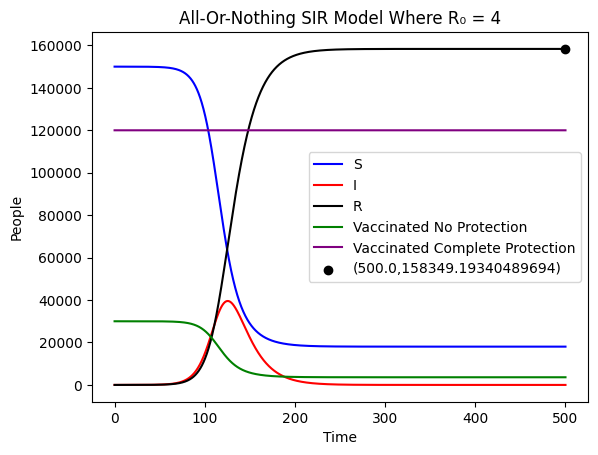

In [11]:
AorNSimulator(1/14,0.5,4,0.8,149999/300000,1/300000,0,300000,500) 

The value of I at time t=600.0 is 0.02508282114432071
The value of R at time t=600.0 is 131992.4832088313
The value of S at time t=600.0 is 40006.19863866158
The value of Vaccine Total Protection at time t=600.0 is 120000.0
The value of Vaccine No Protection at time t=600.0 is 8001.293069686069


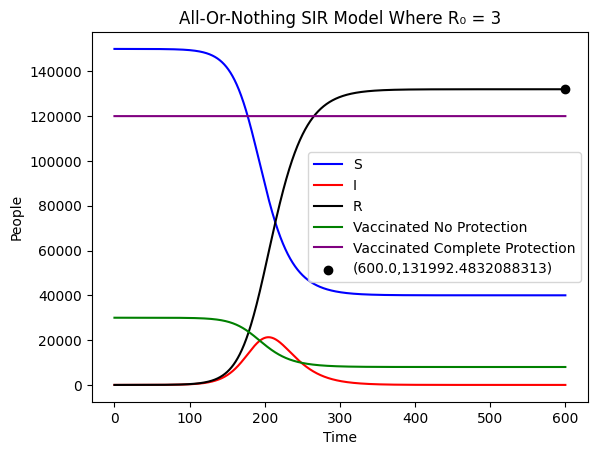

In [12]:
AorNSimulator(1/14,0.5,3,0.8,149999/300000,1/300000,0,300000,600)

In [13]:
# Define a function that will simulate a basic SIR All-Or-Nothing vaccine based on gamma, percent of pop that can be vaccinated,
# rnaught, vaccine efficacy, s0, i0, r0, N, and how long you want it to go on for
def LeakySimulator(Gamma,Vacc,Rnaught,VEff,s0,i0,r0,N,timeEnd):
    # This will ensure that I take steps of size 0.25 and set up our time
    timeSeries = np.linspace(0,timeEnd,timeEnd*4)
    # Recover Beta from RNaught and Gamma
    Beta = Rnaught * Gamma
    # Set up initial lists and deltaT
    deltaT = timeSeries[1]-timeSeries[0]
    sValues = [s0]
    iValues = [i0]
    rValues = [r0]
    # vValues will be the uninfected vaccinated people. Its initial value is the proportion of those vaccinated
    vValues = [Vacc]
    # Go ahead and using the timeSeries simulate a forward Euler method using the differential equations from class
    for index,value in enumerate(timeSeries):
        if(index!=0):
            iPrev = iValues[index-1]
            sPrev = sValues[index-1]
            vPrev = vValues[index-1]
            sNew = sPrev+deltaT*(-Beta*sPrev*iPrev)
            iNew = iPrev + deltaT*(Beta*sPrev*iPrev+Beta*vPrev*iPrev*(1-VEff)-Gamma*iPrev)
            rNew = rValues[index-1] + deltaT*(Gamma*iPrev)
            vNew = vPrev + deltaT*(-Beta*vPrev*iPrev*(1-VEff))
            sValues.append(sNew)
            iValues.append(iNew)
            rValues.append(rNew)
            vValues.append(vNew)
    # Plot the results and give appropiate axis titles and graph title
    # This article was used to figure out how to put subscripts into strings
    # https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
    plt.title("Leaky SIR Model Where R\u2080 = "+str(Rnaught))
    plt.xlabel("Time")
    plt.ylabel("People")
    # Plot each list of values*N against the time series and give them appropiate colors and labels
    plt.plot(timeSeries,[s*N for s in sValues],"blue",label="S")
    plt.plot(timeSeries,[i*N for i in iValues],"red",label="I")
    plt.plot(timeSeries,[r*N for r in rValues],"black",label="R")
    plt.plot(timeSeries,[v*N for v in vValues],"green",label="Uninfected Vaccinated")
    plt.scatter(timeSeries[-1],rValues[-1]*N,color='black',label = "("+str(timeSeries[-1])+','+str(rValues[-1]*N)+")")
    # Also print the final values of each category for use
    print("The value of I at time t="+str(timeSeries[-1])+" is "+str(iValues[-1]*N))
    print("The value of R at time t="+str(timeSeries[-1])+" is "+str(rValues[-1]*N))
    print("The value of S at time t="+str(timeSeries[-1])+" is "+str(sValues[-1]*N))
    print("The value of Uninfected Vaccinated at time t="+str(timeSeries[-1])+" is "+str(vValues[-1]*N))
    # https://www.tutorialspoint.com/how-to-show-0-0-on-matplotlib-graph-at-the-bottom-left-corner
    # Set the legends location
    plt.legend(loc="center right")
    plt.show()

The value of I at time t=400.0 is 0.0227745302810263
The value of R at time t=400.0 is 226089.2123321167
The value of S at time t=400.0 is 3380.7786231319074
The value of Uninfected Vaccinated at time t=400.0 is 70529.98627022024


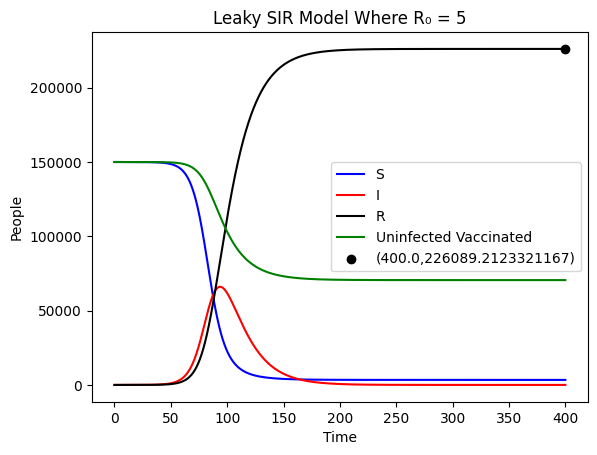

In [14]:
LeakySimulator(1/14,0.5,5,0.8,149999/300000,1/300000,0,300000,400)

The value of I at time t=500.0 is 0.004890968788522639
The value of R at time t=500.0 is 202726.0557856863
The value of S at time t=500.0 is 9949.476845203559
The value of Uninfected Vaccinated at time t=500.0 is 87324.46247814088


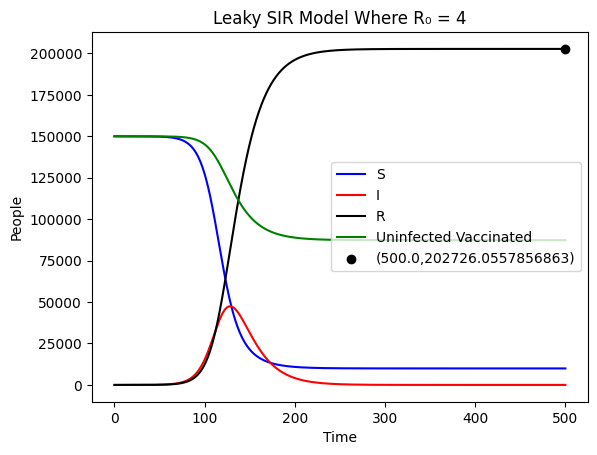

In [15]:
LeakySimulator(1/14,0.5,4,0.8,149999/300000,1/300000,0,300000,500)

The value of I at time t=600.0 is 0.08482361403986752
The value of R at time t=600.0 is 161815.0048854482
The value of S at time t=600.0 is 29667.70921558802
The value of Uninfected Vaccinated at time t=600.0 is 108517.20107534953


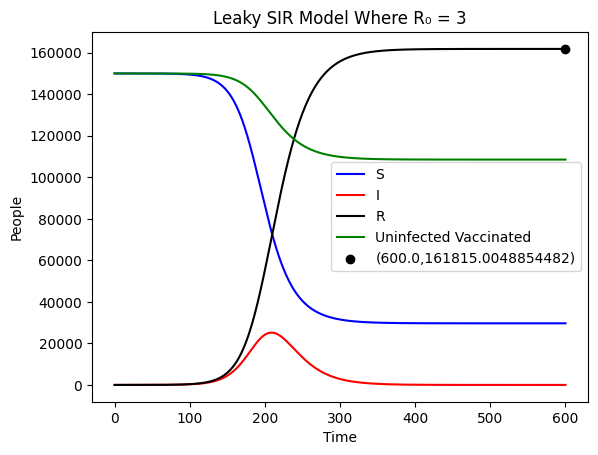

In [16]:
LeakySimulator(1/14,0.5,3,0.8,149999/300000,1/300000,0,300000,600)